In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\6.overlap.csv",header=None)

In [4]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

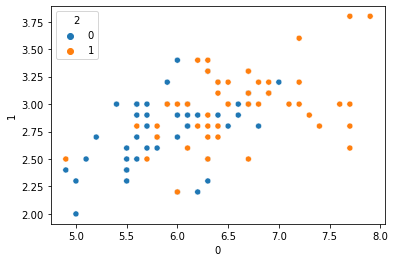

In [7]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## Split the data into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## Build the neural networks

In [24]:
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer='random_normal',input_dim=2))
model.add(Dropout(0.25))
model.add(Dense(5,activation='relu',kernel_initializer='random_normal'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='relu',kernel_initializer='random_normal'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [26]:
# compile model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.2)

Epoch 1/50


C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 31ms/step - loss: 0.6932 - accuracy: 0.4444 - val_loss: 0.6927 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.6111
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.6111
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.6111
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.6111
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6937 - accuracy: 0.4306 - val_loss: 0.6929 - val_accuracy: 0.6111
Epoch 8/50
8/8 [============================

In [28]:
y_cap= model.predict(X_test_trans)

1/1 [==============================] - 0s 71ms/step


In [29]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.7

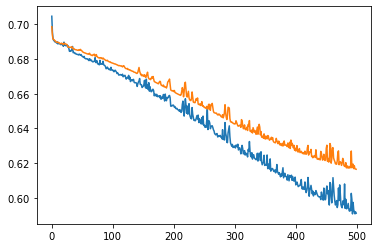

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [32]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

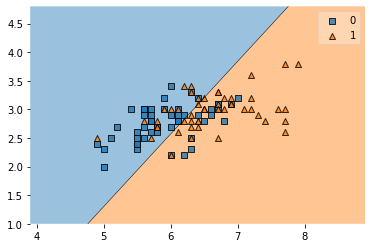

In [25]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)